In [2]:
#importar paquetes
import math
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Import Qiskit
from qiskit import BasicAer, Aer , execute
from qiskit import QuantumCircuit , ClassicalRegister , QuantumRegister

In [3]:
import numpy as np
#Super secret message
mes = 'Top secret Quantum'
print('Your super secret message: ',mes)

#initial size of key
n = len(mes)*3
#break up message into smaller parts if length > 10
nlist = []
for i in range(int(n/10)):
    nlist.append(10)
if n%10 != 0:
    nlist.append(n%10)
print('Initial key length: ',n)

Your super secret message:  Top secret Quantum
Initial key length:  54


In [4]:
# Hacer cadenas a l e a t o r i a s de l o n g i t u d s t r ing􀀀l e n g t h
def randomStringGen(string_length):
#Va r i a b l e s de s a l i d a u t i l i z a d a s para acceder a l o s r e s u l t a d o s
    output_list = []
    output = ''
#i n i c i a l a información d e l c i r c u i t o cuánt i co
    backend = Aer.get_backend('qasm_simulator')
    circuits = ['rs']
#Ejecución d e l c i r c u i t o cuánt i co en a r r e g l o s de 10 q u b i t s
#Los r e s u l t a d o s se agregarán y se r e cor tarán a l tamaño n b i t c o r r e c t o .

    n = string_length
    temp_n = 10
    temp_output = ''
    for i in range (math.ceil(n/temp_n )):
    
#I n i c i a l i z a r l o s r e g i s t r o s cuánt i c o s en e l c i r c u i t o .
        q = QuantumRegister(temp_n, name='q')
        c = ClassicalRegister(temp_n, name='c')
        rs = QuantumCircuit(q, c, name='rs')
#c r ear temp_n número de q u b i t s todos en s u p e r p o s i c i one s
#La pue r ta Hadamard es l a que hace l a s u p e r p o s i c i one .
        for i in range (temp_n ) :
            rs.h(q[i])
            rs.measure(q[i], c[i])
#Ej e cutar c i r c u i t o y e x t r a e r 0 s y 1 s de l a Clave
        result = execute(rs, backend, shots =1).result()
        counts = result.get_counts(rs)
        result_key = list(result.get_counts(rs).keys())
        temp_output = result_key[0]
        output += temp_output
#Sa l i d a de r e torno r e cor tada a l tamaño n
    return output[:n]


In [5]:
key = randomStringGen(n)
ln = len(key)
print( 'Clave inicial: ' , key )
print( 'Longitud de la Clave: ' , ln )

Clave inicial:  001101101011010111100110110101010011001001110110101010
Longitud de la Clave:  54


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
#ge ne r a r cadenas de r o t a c i ó n a l a z a r para A l i c e y Bob
Alice_rotate = randomStringGen(n)
Bob_rotate = randomStringGen(n)
print ( "Cadena de rotación de alicia: " , Alice_rotate)
print ( "Cadena de rotación de Bob: " , Bob_rotate)

#i n i c i a r c u á n t i c o c u á n t i c o
backend = Aer.get_backend('qasm_simulator')
shots = 1
circuits = ['send_over']
Bob_result = ''

#D e f i n i r l a s v a r i a b l e s t em p o r al e s u t i l i z a d a s en l a d i v i s i ó n d e l
#c u á n t i c o c u án t ic o , e s d e c i r s i l a l o n g i t u d d e l mensa je > 10
for ind, l in enumerate(nlist):
    if l < 10:
        key_temp = key[10*ind: 10*ind+l ]
        Ar_temp = Alice_rotate[ 10 * ind: 10 * ind+l]
        Br_temp = Bob_rotate[ 10 * ind: 10 * ind+l]
    else:
        key_temp = key[ l * ind: l*(ind +1)]
        Ar_temp = Alice_rotate[l*ind : l *( ind +1)]
        Br_temp = Bob_rotate[ l * ind: l *( ind +1)]
        
#i n i c i a l a in f o rm ac i ón de t u c i r c u i t o c u á n t i c o
    q = QuantumRegister( l, name = 'q' )
    c = ClassicalRegister(l, name= 'c' )
    send_over = QuantumCircuit( q, c, name='send_over' )
    
#p re p a r a r q u b i t s b a s a d o s en c l a v e ; Añad ir p u e r t a s Hadamard
#para A l i c e y Bob
#cadenas de r o t a c i ó n
    for i, j, k, n in zip( key_temp, Ar_temp, Br_temp, range( 0, len(key_temp))):
        i = int ( i )
        j = int ( j )
        k = int ( k )
        if i > 0 :
            send_over.x(q[n])
#cadena de r o t a c i ó n de A l i c i a

        if j > 0 :   
            send_over.h(q[n])
            
#cadena de r o t a c i ó n de Bob

        if k > 0 :
            send_over.h(q[n])
        send_over.measure(q[n], c[n])
        
#e j e c u t a r e l c i r c u i t o c u á n t i c o
    result_so = execute([send_over], backend , shots = shots).result()
    counts_so = result_so.get_counts(send_over)
    result_key_so = list( result_so.get_counts(send_over).keys())
    Bob_result += result_key_so[0][::-1]
    
print( "Los resultados de bob: " , Bob_result )
    

Cadena de rotación de alicia:  111100101011010100000001011111100001000000010110001011
Cadena de rotación de Bob:  010101111101010101010111011001100000110110010100000100
Los resultados de bob:  100101101101010110100110110001010011001111110110100010


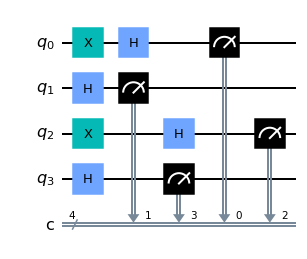

In [7]:
#impr im ir c i r c u i t o c u á n t i c a para l a s med idas de Bob i n i c i a l i z a d o en ce r o
send_over.draw()

In [8]:
#E j e c u t e e l c i r c u i t o en e l s im ul a d o r de qasm
backend_sim = BasicAer.get_backend('qasm_simulator')

#número de r e p e t i c i o n e s d e l c i r c u i t o 1024 v a l o r p re de te rm in a d o
job_sim = execute(send_over, backend_sim, shots = 1024)

#l o s r e s u l t a d o s de l a s im ul a c i ó n
result_sim = job_sim.result()
counts = result_sim.get_counts( send_over )
print(counts)

{'1110': 50, '0010': 67, '0110': 55, '0001': 75, '0100': 52, '0101': 58, '1010': 59, '1101': 71, '1111': 65, '1011': 82, '0000': 66, '1000': 68, '0111': 67, '1100': 64, '0011': 66, '1001': 59}


In [9]:
#s e l e c c i ó n de l o s b i t de l a c l a v e
def makeKey (rotation1, rotation2, results):
    key = ''
    count = 0
    for i, j in zip(rotation1, rotation2) :
        if i == j :
            key += results[count]
        count += 1
    return key

Akey = makeKey ( Bob_rotate , Alice_rotate, key )
Bkey = makeKey ( Bob_rotate , Alice_rotate, Bob_result )
print( "Clave de Alice: " , Akey )
print ( "Clave de Bob: " , Bkey )

Clave de Alice:  01011101011100110101001111101010
Clave de Bob:  01011101011100110101001111101010


In [10]:
#c i f r a d o y d e s c i f r a d o d e l mensa je con l a c l a v e generada c á u s t i c am e n t e
shortened_Akey = Akey[:len(mes)]
encoded_m = ''

#c i f r a r e l mensa je u t i l i z a n d o mi c l a v e de c i f r a d o c l a v e f i n a l
for m, k in zip(mes , shortened_Akey ):
    caracter = ord(m)
    xor = caracter^ord(k)
    encoded_m += chr(xor )
    
print('mensaje codificado: ', encoded_m )

#h ace r c l a v e i g u a l l o n g i t u d t i e n e mensa je
shortened_Bkey = Bkey [ : len (mes ) ]
decoded_m = ''

for m, k in zip ( encoded_m , shortened_Bkey ) :
    caracter_d = ord(m)
    xor = caracter_d^ord(k)
    decoded_m += chr(xor)
    
print('mensaje decodificado: ' , decoded_m )


mensaje codificado:  d^@BTSCUE`EQ_EE\
mensaje decodificado:  Top secret Quantum


# Intervención de Eve 

In [11]:
#i n i c i a l a s im ul a c i ó n c u á n t i c a
backend = Aer.get_backend('qasm_simulator')
shots = 1
circuits = [ 'Eve']
Eve_result = ''

for ind, l in enumerate( nlist ) :
    
#D e f i n i r l a s v a r i a b l e s t em p o r al e s para e l programa c u á n t i c o
#s i l a l o n gi t u d del mensa je > 10
    if l < 10:
        key_temp = key[10*ind: 10*ind+l]
        Ar_temp = Alice_rotate[10*ind: 10 * ind+l ]
    else:
        key_temp = key[ l*ind: l*(ind +1)]
        Ar_temp = Alice_rotate[l* ind: l*(ind +1)]

#i n i c i a e l r e s t o de l a in f o rm ac i ón de t u c i r c u i t o c u á n t i c o
    q = QuantumRegister ( l , name='q' )
    c = ClassicalRegister( l , name='c' )
    Eve = QuantumCircuit ( q , c , name='Eve' )
    
#r o t a c i ó n de Eve
    for i , j , n in zip ( key_temp , Ar_temp , range ( 0 , len ( key_temp ) ) ) :
        i = int ( i )
        j = int ( j )
        if i > 0 :
            Eve.x(q[n])
        if j > 0 :
            Eve.h(q[n])
            
        Eve.measure(q[n], c[n])
        
    result_eve = execute(Eve, backend, shots = shots).result()
    counts_eve = result_eve.get_counts()
    result_key_eve = list(result_eve.get_counts().keys())
    Eve_result += result_key_eve[0][::-1]
    
print("resultados de Eve: ", Eve_result)

resultados de Eve:  100001001000010111100110101000010010001001110010100011


{'1101': 131, '1000': 127, '0101': 119, '1001': 124, '0001': 127, '0000': 144, '0100': 118, '1100': 134}


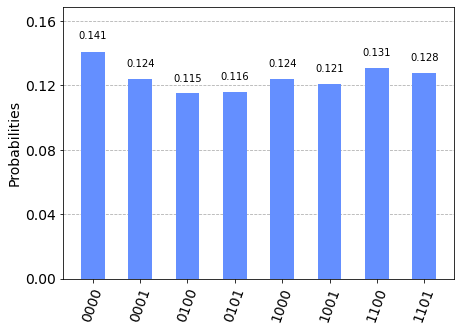

In [12]:
#E j e c u t e e l c i r c u i t o en e l s im ul a d o r de qasm para l a s medidad de Eve .
backend_sim = BasicAer.get_backend('qasm_simulator')

# e l número de r e p e t i c i o n e s d e l c i r c u i t o e s de 1024
job_sim = execute(Eve , backend_sim , shots = 1024)

# Grab t h e r e s u l t s from t h e j o b .
result_sim = job_sim.result()
counts_Eve = result_sim.get_counts(Eve)
print( counts_Eve )
plot_histogram( counts_Eve )

#print(result_sim)

In [18]:
#i n i c i a t u programa c u á n t i c o
backend = Aer.get_backend ('qasm_simulator')
shots = 1
circuits = [ 'Eve2']
Bob_badresult = ''

for ind, l in enumerate(nlist):
#D e f i n i r l a s v a r i a b l e s t em p o r al e s u t i l i z a d a s
#d i v i s i ó n d e l c u á n t i c o s i l a l o n g i t u d d e l mensa je > 10
    if l < 10:
        key_temp = key[10 * ind: 10 * ind+l ]
        Eve_temp = Eve_result[ 10 * ind : 10 * ind+l ]
        Br_temp  = Bob_rotate[ 10 * ind : 10 * ind+l ]
    else:
        key = key[l * ind : l*(ind+1)]
        Eve_temp = Eve_result[ l * ind : l*(ind +1)]
        Br_temp = Bob_rotate [ l * ind : l*(ind +1)]

#i n i c i a e l r e s t o de l a in f o rm ac i ón de t u c i r c u i t o c u á n t i c o
    q = QuantumRegister(l, name = 'q' )
    c = ClassicalRegister(l, name= 'c' )
    Eve2 = QuantumCircuit(q , c , name='Eve2' )
    
    
#p re p a r a r q u b i t s
    for i , j , n in zip (Eve_temp, Br_temp , range(0, len(key_temp))):
        i = int(i)
        j = int(j)
        if i > 0 :
            Eve2.x(q[n])
        if j > 0 :
            Eve2.h(q[n])
            
        Eve2.measure(q[n], c[n])
            
    result_eve = execute( Eve2 , backend , shots=shots).result()
    #counts_eve = result_eve.get_counts()
    #result_key_eve = list(result_eve.get_counts().keys())
    Bob_badresult += result_key_eve[0][::-1]
    
print( "Los resultados anteriores de Bob (w/o Eve): " , Bob_result )
print( "Los resultados de bob de eva: \t \t " , Bob_badresult )
   # print(result_eve_sim)

Los resultados anteriores de Bob (w/o Eve):  100101101101010110100110110001010011001111110110100010
Los resultados de bob de eva: 	 	  011000000001100000000110000000011000000001100000000110000000


No measurements in circuit "Eve2", classical register will remain all zeros.


{'0000': 1024}


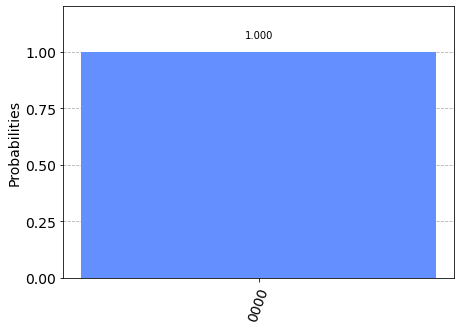

In [15]:
#E j e c u t e e l c i r c u i t o en e l s im ul a d o r de qasm
backend_sim = BasicAer.get_backend('qasm_simulator')

# Hemos e s t a b l e c i d o e l número de r e p e t i c i o n e s d e l c i r c u i t o .
# para s e r 1024 , que e s e l v a l o r p re de te rm in a d o .
job_sim = execute(Eve2, backend_sim , shots=1024)

#r e s u l t a d o s de l a s im ul a c i ó n
result_sim = job_sim.result()
counts_Eve_Bob = result_sim.get_counts(Eve2)
print (counts_Eve_Bob)
plot_histogram( counts_Eve_Bob )

In [16]:
#Eve.draw()
print(Eve_temp)

0011
